### Instructions

#### Imports

In [1]:
# System imports
import numpy as np
import matplotlib.pyplot as plt

from c3.c3objs import Quantity as Qty
from c3.signal import gates
from c3.signal import pulse
from c3.libraries import envelopes

2022-02-07 09:37:40.978819: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
t_final = 7e-9   # Time for single qubit gates
gauss_params_single = {
    'amp': Qty(
        value=0.5,
        min_val=0.2,
        max_val=0.6,
        unit="V"
    ),
    't_final': Qty(
        value=t_final,
        min_val=0.5 * t_final,
        max_val=1.5 * t_final,
        unit="s"
    ),
    'sigma': Qty(
        value=t_final / 4,
        min_val=t_final / 8,
        max_val=t_final / 2,
        unit="s"
    ),
    'xy_angle': Qty(
        value=0.0,
        min_val=-0.5 * np.pi,
        max_val=2.5 * np.pi,
        unit='rad'
    ),
    'freq_offset': Qty(
        value=0e6 ,
        min_val=-5e6 ,
        max_val=5e6 ,
        unit='Hz 2pi'
    ),
    'delta': Qty(
        value=-1,
        min_val=-5,
        max_val=3,
        unit=""
    )
}

2022-02-07 09:37:53.775814: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-02-07 09:37:53.937987: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-07 09:37:53.938032: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2022-02-07 09:37:53.989845: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Here we take `gaussian_nonorm()` from the libraries as the function to define the shape.

In [3]:
gauss_env_single = pulse.Envelope(
    name="gauss",
    desc="Gaussian comp for single-qubit gates",
    params=gauss_params_single,
    shape=envelopes.gaussian_nonorm
)

#### Instructions
We define the gates we want to perform with a "name" that will identify them later and "channels" relating to the control Hamiltonians and drive lines we specified earlier. As a start we write down 90 degree rotations in the positive $x$-direction and identity gates for both qubits. Then we add a carrier and envelope to each.

In [4]:
rx90p_q1 = gates.Instruction(
    name="rx90p", targets=[0], t_start=0.0, t_end=t_final, channels=["d1"]
)
rx90p_q1.add_component(gauss_env_single, "d1")

In [5]:
rx90p_q1.params["use_t_before"] = True

In [6]:
ts = np.linspace(0.0, 10e-9, 15)
signal, norm = rx90p_q1.get_awg_signal("d1", ts, options={"drag_2": True})

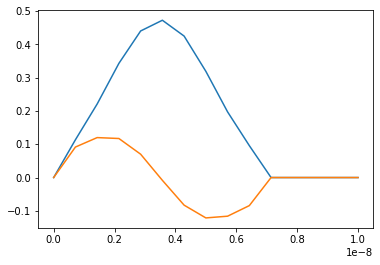

In [7]:
plt.plot(ts, signal["inphase"])
plt.plot(ts, signal["quadrature"])

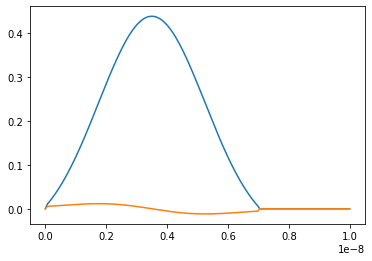

In [8]:
ts = np.linspace(0.0, 10e-9, 150)
signal, norm = rx90p_q1.get_awg_signal("d1", ts, options={"drag_2": True})
plt.plot(ts, signal["inphase"])
plt.plot(ts, signal["quadrature"])

In [109]:
t_final = 7e-9   # Time for single qubit gates
gauss_params_single = {
    'amp': Qty(
        value=0.5,
        min_val=0.2,
        max_val=0.6,
        unit="V"
    ),
    't_final': Qty(
        value=t_final,
        min_val=0.5 * t_final,
        max_val=1.5 * t_final,
        unit="s"
    ),
    'sigma': Qty(
        value=t_final / 4,
        min_val=t_final / 8,
        max_val=t_final / 2,
        unit="s"
    ),
    'xy_angle': Qty(
        value=0.0,
        min_val=-0.5 * np.pi,
        max_val=2.5 * np.pi,
        unit='rad'
    ),
    'freq_offset': Qty(
        value=0e6 ,
        min_val=-5e6 ,
        max_val=5e6 ,
        unit='Hz 2pi'
    ),
    'delta': Qty(
        value=2e-9,
        min_val=0.1e-9,
        max_val=10e-9,
        unit="1/Hz"
    )
}
gauss_env_single = pulse.Envelope(
    name="gauss",
    desc="Gaussian comp for single-qubit gates",
    params=gauss_params_single,
    shape=envelopes.gaussian_nonorm
)
rx90p_q1 = gates.Instruction(
    name="rx90p", targets=[0], t_start=0.0, t_end=t_final, channels=["d1"]
)
rx90p_q1.add_component(gauss_env_single, "d1")
rx90p_q1.params["use_t_before"] = True

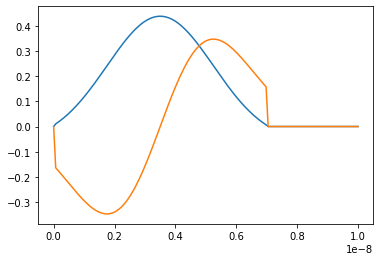

In [110]:
ts = np.linspace(0.0, 10e-9, 150)
signal, norm = rx90p_q1.get_awg_signal("d1", ts, options={"drag": True})
plt.plot(ts, signal["inphase"])
plt.plot(ts, signal["quadrature"])

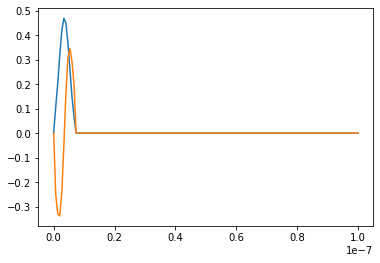

In [111]:
ts = np.linspace(0.0, 100e-9, 150)
signal, norm = rx90p_q1.get_awg_signal("d1", ts, options={"drag": True})
plt.plot(ts, signal["inphase"])
plt.plot(ts, signal["quadrature"])

In [112]:
spectrum = np.fft.fft(signal["inphase"])
spectrum_2 = np.fft.fft(signal["quadrature"])
spectrum_drag = np.fft.fft(signal["inphase"]+signal["quadrature"].numpy())
freq = np.fft.fftfreq(len(spectrum), ts[1])
inds = np.argsort(freq)

(-3e+08, 3e+08)

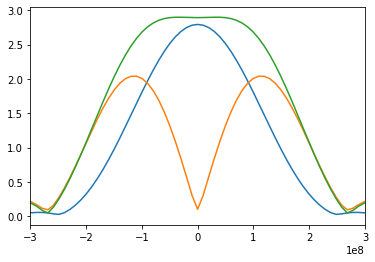

In [113]:
plt.plot(freq[inds], np.abs(spectrum[inds]))
plt.plot(freq[inds], np.abs(spectrum_2[inds]))
plt.plot(freq[inds], np.abs(spectrum_drag[inds]))
plt.xlim(-3e8, 3e8)